<a href="https://colab.research.google.com/github/Serzh147/Python_based/blob/main/Project_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import the dataset
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic/test.csv')

In [ ]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [ ]:
train_df.groupby(train_df['Age'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
False,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


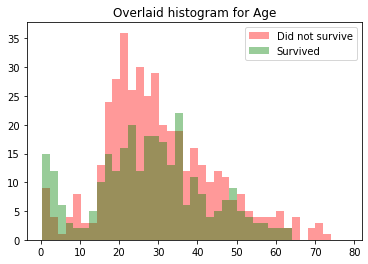

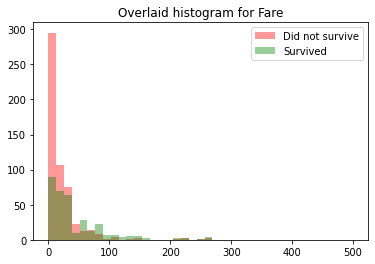

In [ ]:
for i in ['Age', 'Fare']:
  died = list(train_df[train_df['Survived'] == 0][i].dropna())
  survived = list(train_df[train_df['Survived'] == 1][i].dropna())
  xmin = min(min(died), min(survived))
  xmax = max(max(died), max(survived))
  width = (xmax - xmin) / 40
  sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
  sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
  plt.legend(['Did not survive', 'Survived'])
  plt.title('Overlaid histogram for {}'.format(i))
  plt.show()

<Figure size 432x288 with 0 Axes>

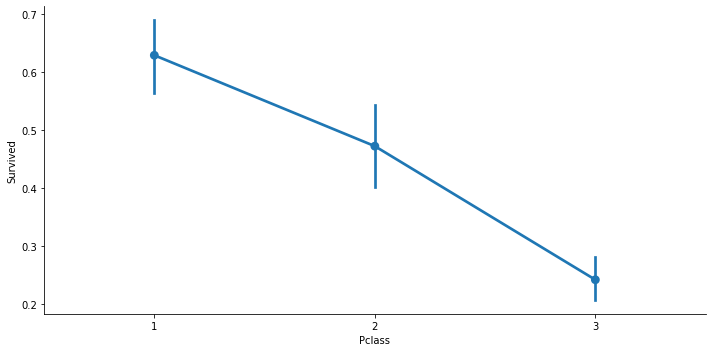

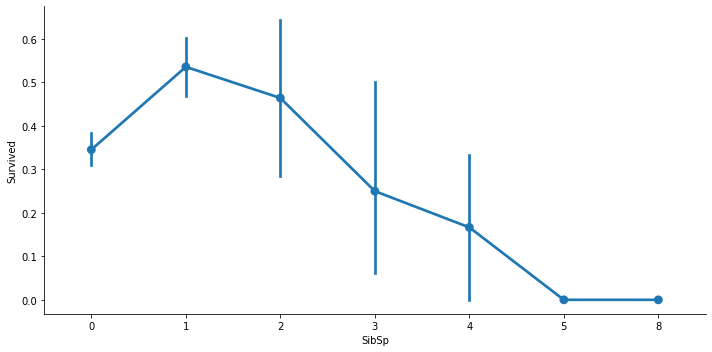

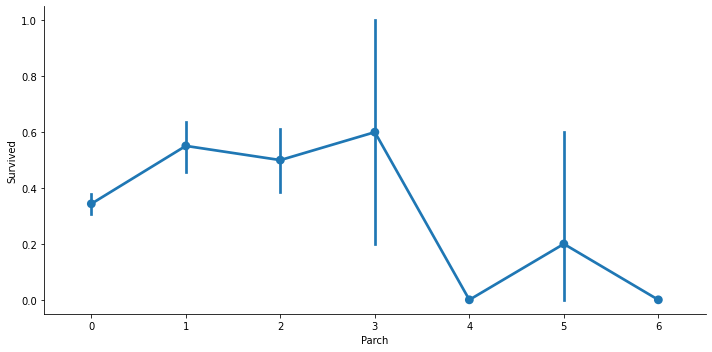

In [ ]:
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
  plt.figure(i)
  sns.catplot(x=col, y='Survived', data=train_df, kind='point', aspect=2,)